In [2]:
# Import modul
import matplotlib.pyplot as plt
import numpy as np

from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs
import hdbscan

In [6]:
# Fungsi visualisasi (dari P1_JS05)
def plot(X, labels, probabilities=None, parameters=None, ground_truth=False, ax=None):
    if ax is None:
        _, ax = plt.subplots(figsize=(10, 4))
    labels = labels if labels is not None else np.ones(X.shape[0])
    probabilities = probabilities if probabilities is not None else np.ones(X.shape[0])
    unique_labels = set(labels)
    colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
    proba_map = {idx: probabilities[idx] for idx in range(len(labels))}
    
    for k, col in zip(unique_labels, colors):
        if k == -1:
            col = [0, 0, 0, 1]  # warna hitam untuk noise
        class_index = (labels == k).nonzero()[0]
        for ci in class_index:
            ax.plot(
                X[ci, 0],
                X[ci, 1],
                "x" if k == -1 else "o",
                markerfacecolor=tuple(col),
                markeredgecolor="k",
                markersize=4 if k == -1 else 1 + 5 * proba_map[ci],
            )
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    preamble = "True" if ground_truth else "Estimated"
    title = f"{preamble} number of clusters: {n_clusters_}"
    if parameters is not None:
        parameters_str = ", ".join(f"{k}={v}" for k, v in parameters.items())
        title += f" | {parameters_str}"
    ax.set_title(title)
    plt.tight_layout()

In [7]:
# Membuat dataset (dari P1_JS05)
centers = [[1, 1], [-1, -1], [1.5, -1.5]]
X, labels_true = make_blobs(
    n_samples=750, centers=centers, cluster_std=[0.4, 0.1, 0.75], random_state=0
)

print(f"Dataset dibuat dengan {len(X)} sampel")
print(f"Shape X: {X.shape}")

Dataset dibuat dengan 750 sampel
Shape X: (750, 2)


## Langkah 7: Eksperimen Hyperparameter `min_cluster_size`

Ubah nilai `min_cluster_size`.

l:\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
l:\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
l:\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
l:\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
l:\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
l:\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: Futur

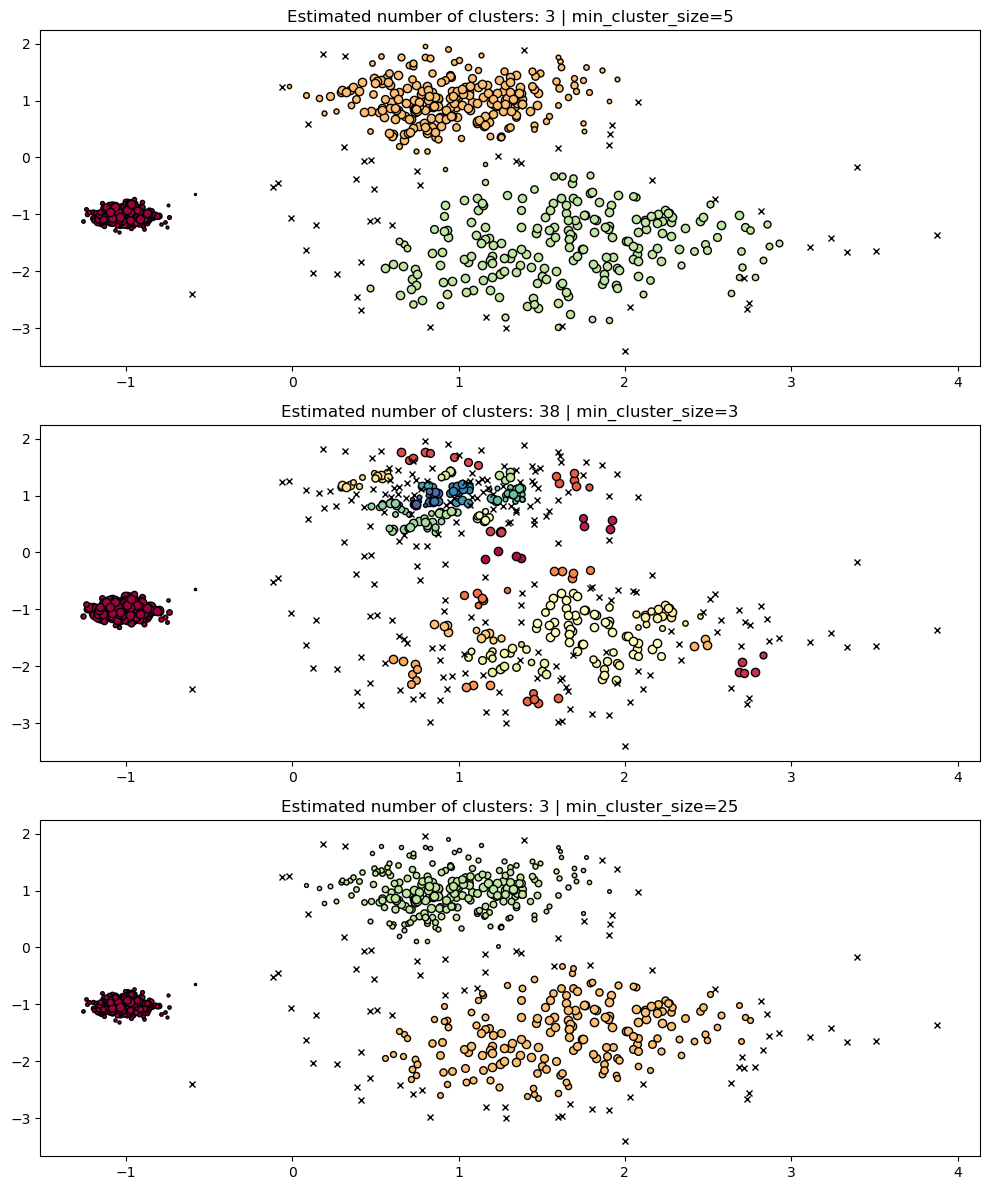

In [8]:
PARAM = ({"min_cluster_size": 5}, {"min_cluster_size": 3}, {"min_cluster_size": 25})
fig, axes = plt.subplots(3, 1, figsize=(10, 12))
for i, param in enumerate(PARAM):
    hdb = hdbscan.HDBSCAN(**param).fit(X)
    plot(X, hdb.labels_, hdb.probabilities_, param, ax=axes[i])

## Langkah 8: Eksperimen Hyperparameter `min_samples`

Ubah nilai `min_samples`.

l:\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
l:\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
l:\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
l:\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
l:\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
l:\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: Futur

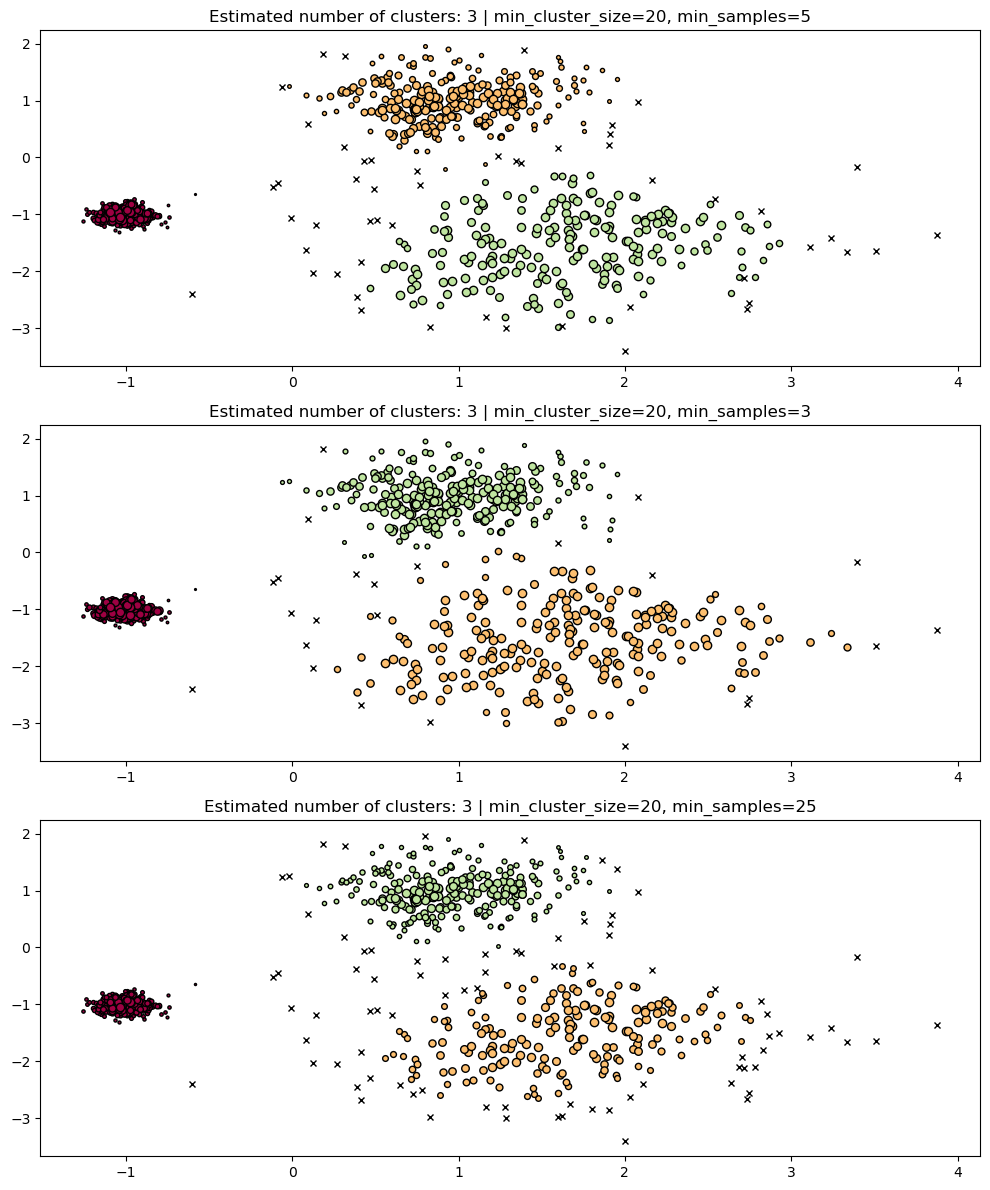

In [9]:
PARAM = (
    {"min_cluster_size": 20, "min_samples": 5},
    {"min_cluster_size": 20, "min_samples": 3},
    {"min_cluster_size": 20, "min_samples": 25},
)
fig, axes = plt.subplots(3, 1, figsize=(10, 12))
for i, param in enumerate(PARAM):
    hdb = hdbscan.HDBSCAN(**param).fit(X)
    plot(X, hdb.labels_, hdb.probabilities_, param, ax=axes[i])

## Langkah 9: DBSCAN Clustering dari Pohon HDBSCAN

Gunakan parameter `cut_distance`.

l:\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
l:\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


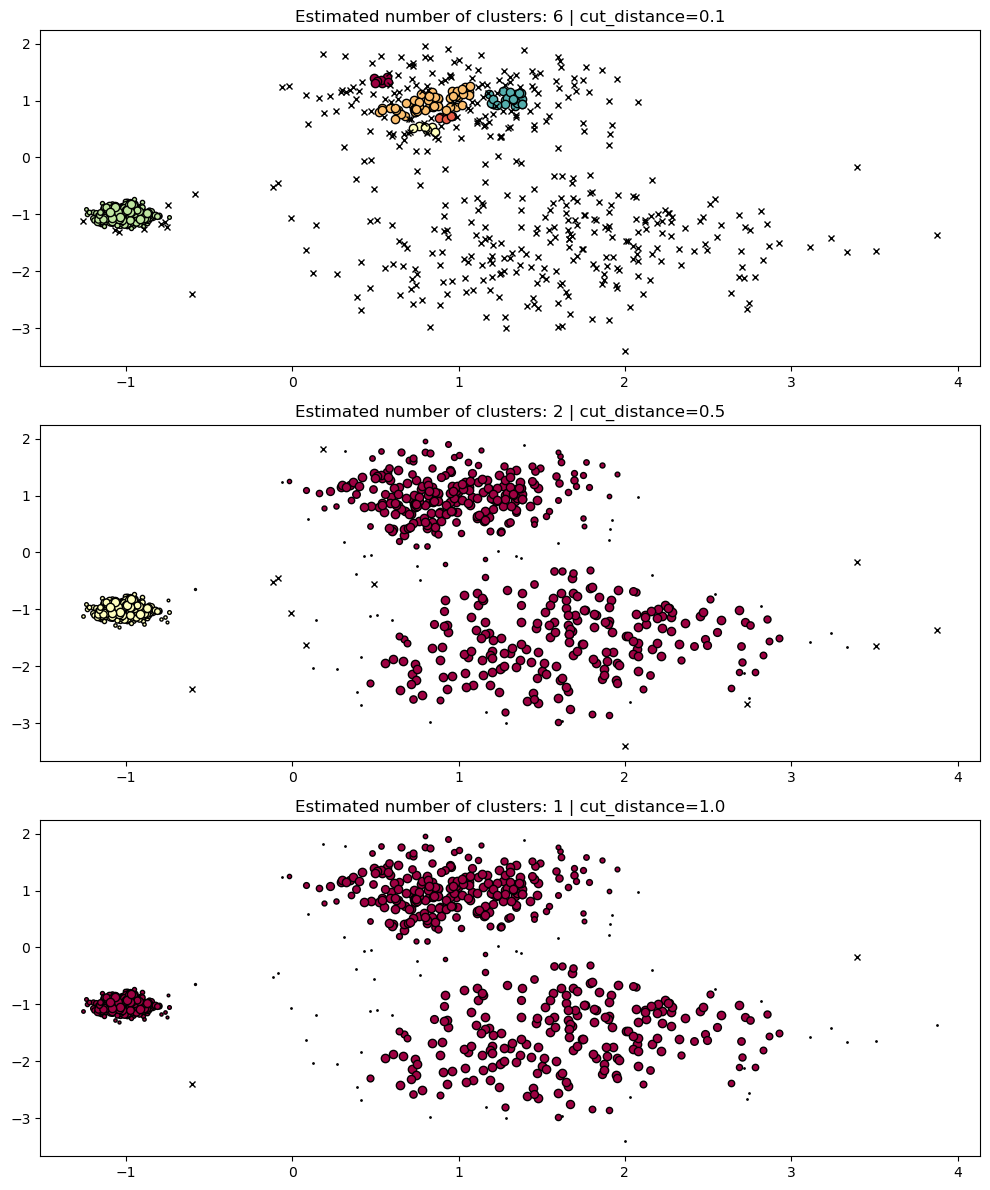

In [10]:
PARAM = (
    {"cut_distance": 0.1},
    {"cut_distance": 0.5},
    {"cut_distance": 1.0},
)
hdb = hdbscan.HDBSCAN().fit(X)
fig, axes = plt.subplots(len(PARAM), 1, figsize=(10, 12))
for i, param in enumerate(PARAM):
    labels = hdb.dbscan_clustering(**param)
    plot(X, labels, hdb.probabilities_, param, ax=axes[i])

## Langkah 10: Evaluasi dengan Silhouette Score

Silhouette Score adalah metrik yang mengukur seberapa baik sebuah data titik di-cluster dalam grupnya sendiri dibandingkan dengan jarak ke grup terdekat lainnya. Nilai Silhouette Score berkisar antara -1 hingga 1, di mana nilai yang lebih tinggi menunjukkan bahwa titik data lebih terisolasi dan lebih cocok dengan cluster-nya.

Jalankan kode berikut untuk menghitung Silhouette Score:

In [11]:
from sklearn.metrics import silhouette_score

# Menghitung Silhouette Score untuk hasil clustering HDBSCAN
sil_score = silhouette_score(X, hdb.labels_)
print(f"Silhouette Score: {sil_score}")

Silhouette Score: 0.6451356578011034


- Jika nilai Silhouette Score mendekati 1, ini menunjukkan bahwa clustering berhasil memisahkan data dengan baik.
- Nilai negatif menunjukkan bahwa data mungkin salah kelompok atau tidak tercluster dengan baik.

## Langkah 11: Evaluasi dengan Davies-Bouldin Index

Davies-Bouldin Index (DBI) adalah metrik yang mengukur kualitas clustering berdasarkan jarak antar cluster dan seberapa besar sebaran dalam masing-masing cluster. Semakin kecil nilai DBI, semakin baik clustering yang dihasilkan.

Jalankan kode berikut untuk menghitung Davies-Bouldin Index:

In [12]:
from sklearn.metrics import davies_bouldin_score

# Menghitung Davies-Bouldin Index untuk hasil clustering HDBSCAN
dbi_score = davies_bouldin_score(X, hdb.labels_)
print(f"Davies-Bouldin Index: {dbi_score}")

Davies-Bouldin Index: 2.128449988081612


- Davies-Bouldin Index yang lebih rendah menunjukkan bahwa clustering lebih baik karena cluster lebih terpisah dengan jelas dan homogen.
- Nilai yang lebih tinggi menunjukkan bahwa cluster lebih saling tumpang tindih dan kurang terpisah dengan jelas.

## Langkah 12: Visualisasi Hasil Evaluasi

Setelah menghitung Silhouette Score dan Davies-Bouldin Index, kita dapat membuat visualisasi untuk mempermudah pemahaman.

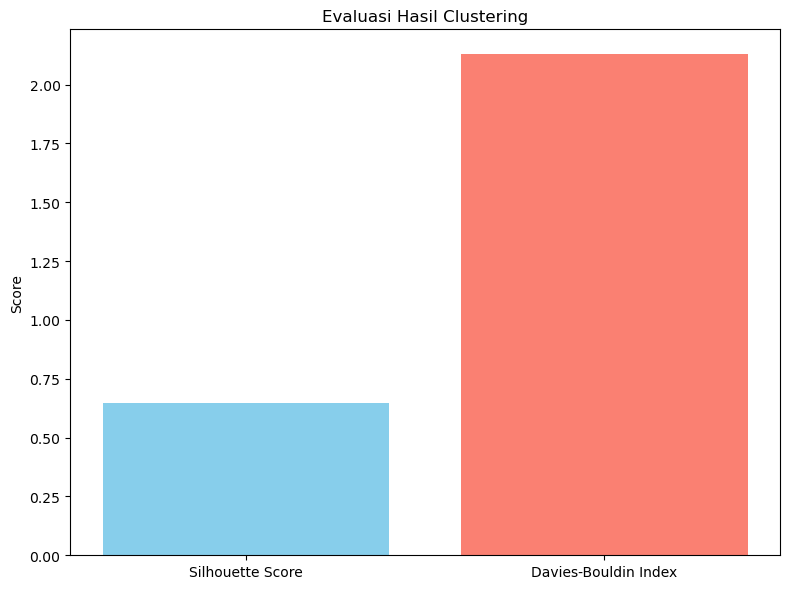

In [13]:
# Misalnya kita ingin membandingkan DBI dan Silhouette Score untuk beberapa eksperimen
scores = {
    "Silhouette Score": sil_score,
    "Davies-Bouldin Index": dbi_score
}

# Plot hasil evaluasi
fig, ax = plt.subplots(figsize=(8, 6))
ax.bar(scores.keys(), scores.values(), color=['skyblue', 'salmon'])
ax.set_title("Evaluasi Hasil Clustering")
ax.set_ylabel("Score")
plt.tight_layout()
plt.show()